In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5,assuming inp is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1349 - val_loss: 0.1262
Epoch 2/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1224 - val_loss: 0.1162
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1139 - val_loss: 0.1092
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1081 - val_loss: 0.1042
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1039 - val_loss: 0.1011
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1008 - val_loss: 0.0983
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0985 - val_loss: 0.0964
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0969 - val_loss: 0.0950
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0958 - val_loss: 0.0941
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0951 - val_lo

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

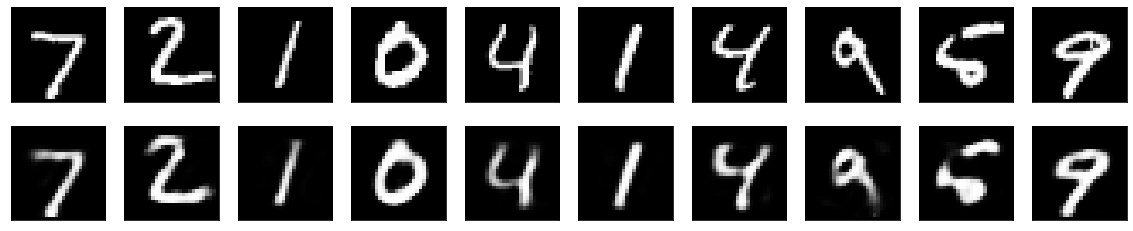

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.2451 - val_loss: 0.1640
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1485 - val_loss: 0.1364
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1323 - val_loss: 0.1269
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1241 - val_loss: 0.1193
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1186 - val_loss: 0.1149
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1141 - val_loss: 0.1109
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1101 - val_loss: 0.1068
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1066 - val_loss: 0.1039
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1043 - val_loss: 0.1022
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1027 - val_lo

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')